# Demo Notebook for X-Ray Crystal Diffraction

## Header 

In [1]:
# Activate matplotlib magic
%matplotlib inline

In [2]:
# Import all SimEx modules
from SimEx import *

initializing ocelot...


## Configuration

### Configure photon beam properties

In [3]:
beam = PhotonBeamParameters(
        photon_energy = 5.0e3*electronvolt,
        beam_diameter_fwhm=2e-7*meter,
        pulse_energy=0.45e-3*joule,
        photon_energy_relative_bandwidth=0.003,
        divergence=0.0*radian,
        photon_energy_spectrum_type='tophat',
        )

### Configure Detector geometry

#### One panel

In [4]:
panel0 = DetectorPanel(pixel_size=8*200.0e-6*meter,
                      energy_response=1.0/electronvolt,
                      distance_from_interaction_plane=0.05*meter,
                      saturation_adu=1.e6,
                      corners={"x" : -63, "y": -63},
                      ranges={"fast_scan_min" : 0, "fast_scan_max" : 127,
                              "slow_scan_min" : 0, "slow_scan_max" : 127},
                      )

In [5]:
detector_geometry = DetectorGeometry(panels=panel0)

### Configure the Diffractor Parameters

In [6]:
diffractor_parameters = CrystFELPhotonDiffractorParameters(sample='5udc.pdb',
                                                           crystal_size_range=[1e-7,1e-7],
                                                           number_of_diffraction_patterns=1,
                                                           beam_parameters=beam,
                                                           detector_geometry=detector_geometry,
                                                          )

PDB file 5udc.pdb could not be found. Attempting to query from protein database server.


### Initialize the Diffractor 

In [7]:
diffractor = CrystFELPhotonDiffractor(parameters=diffractor_parameters,
                                      input_path=None,
                                      output_path="xstal_diffr")

## Run the simulation 

### Launch simulation 

In [8]:
diffractor.backengine()

0

### Save data to hdf5 

In [9]:
diffractor.saveH5()

Renaming diffr_out_0000001.h5 to _0000001.h5.


## Analysis 

### Setup analysis object 

In [10]:
analysis = DiffractionAnalysis(diffractor.output_path)

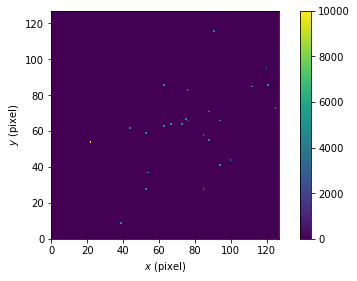

In [11]:
analysis.plotPattern()

In [ ]:
import shutil, os

In [ ]:
# Cleanup previous run
dirs_to_remove=['xstal_diffr']
files_to_remove=['xstal_diffr.h5', '5udc.pdb']

In [ ]:
for d in dirs_to_remove:
    if os.path.isdir(d):
        shutil.rmtree(d)
for f in files_to_remove:
    if os.path.isfile(f):
        os.remove(f)